### importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('gas_turbines.csv')
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

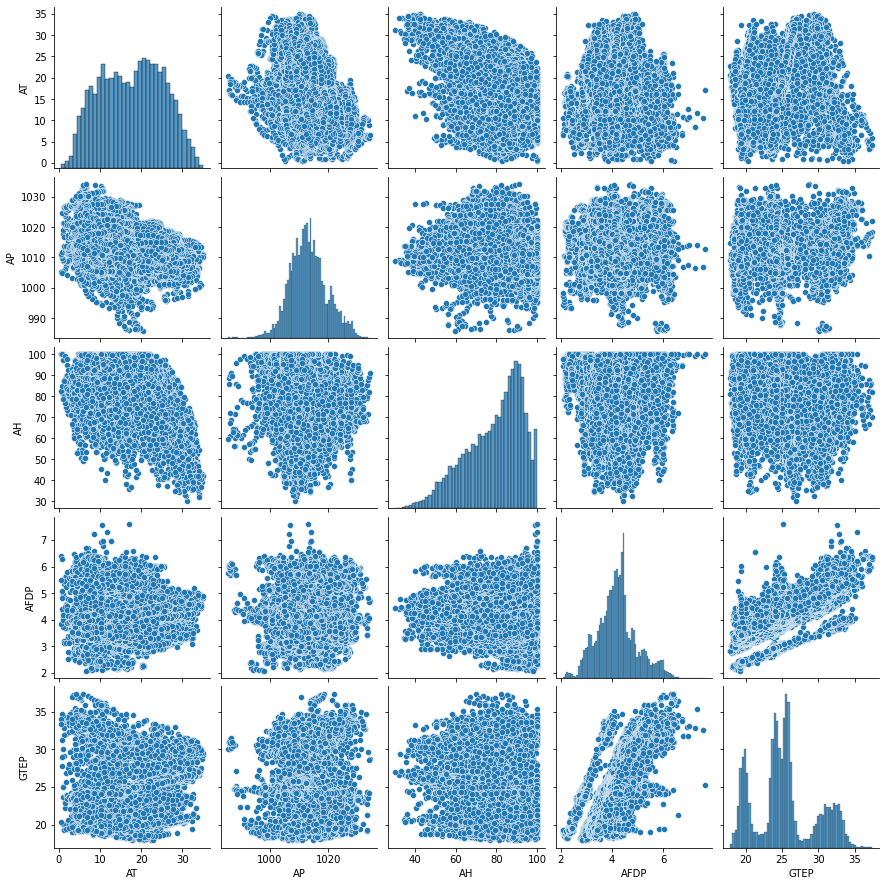

In [32]:
sns.pairplot(df.iloc[:,:5])
plt.show()

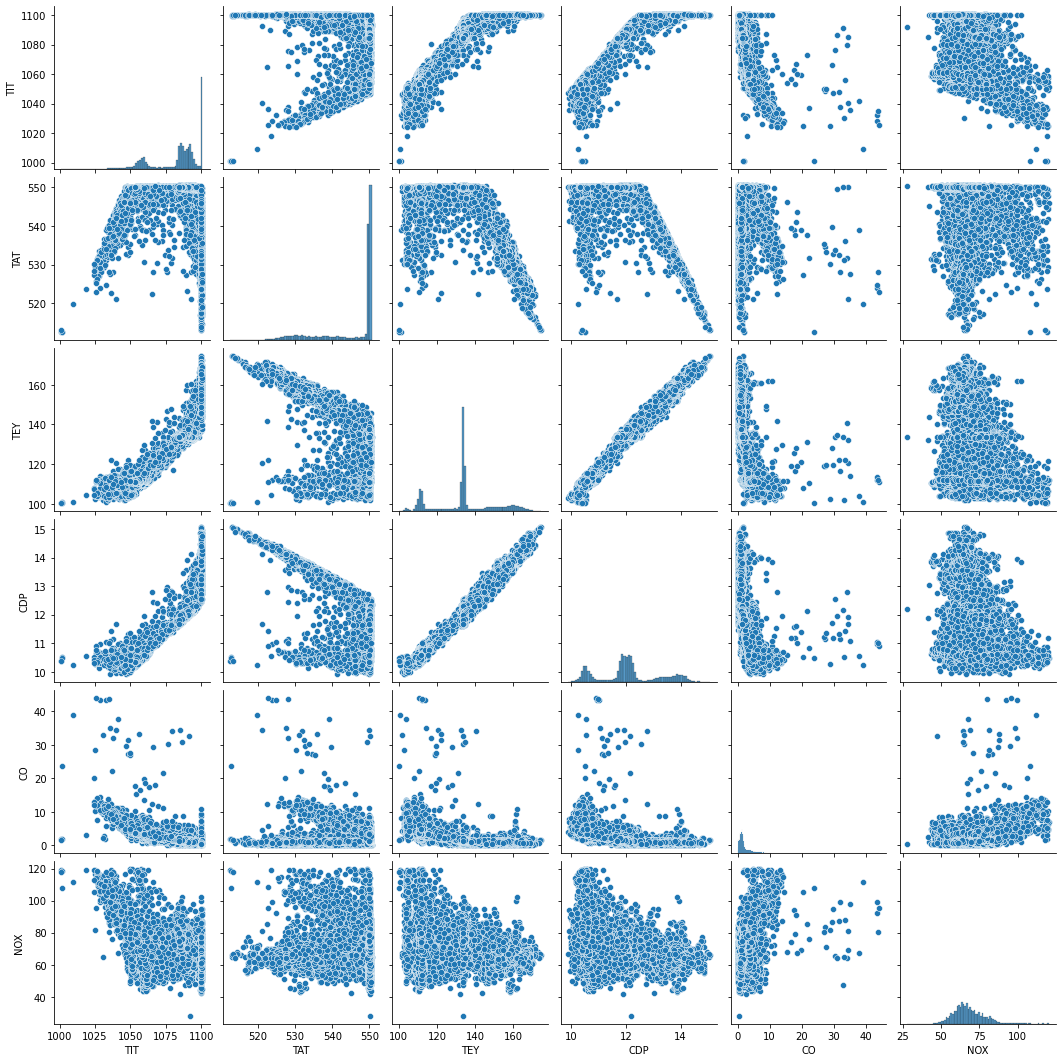

In [39]:
sns.pairplot(df.iloc[:,5:])
plt.show()

In [3]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [4]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

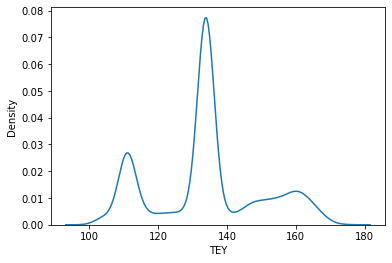

In [42]:
sns.distplot(df.TEY, hist = False)
plt.show()

### Data Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df.std()

AT       7.574323
AP       6.410760
AH      13.793439
AFDP     0.760197
GTEP     4.173916
TIT     16.527806
TAT      7.866803
TEY     15.829717
CDP      1.103196
CO       2.222206
NOX     10.470586
dtype: float64

In [7]:
X = df.drop(['TEY'],axis=1)
y = df[['TEY']]

**standardizing inputs**

In [8]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)
scaled_X

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.439778 -0.826644  1.281436 -0.921232 -1.379101 -1.488376  0.585240   
1     -1.449601 -0.748647  1.304564 -0.921495 -1.363528 -1.482325  0.585240   
2     -1.434721 -0.686250  1.219086 -0.944385 -1.351309 -1.476275  0.568715   
3     -1.413702 -0.623853  1.169060 -0.946884 -1.348194 -1.464173  0.583969   
4     -1.368693 -0.545857  1.161883 -0.924389 -1.354663 -1.458123  0.582698   
...         ...       ...       ...       ...       ...       ...       ...   
15034 -1.153182 -1.185428  1.401860 -0.865850 -1.498657 -2.063184  0.103453   
15035 -1.303986 -1.138630  1.447753 -0.913470 -1.438759 -2.268905 -0.276638   
15036 -1.386267 -1.076233  1.476971 -0.951488 -1.410967 -2.789257 -1.026650   
15037 -1.420423 -0.998236  1.441590 -0.988848 -1.447624 -2.456474 -0.528337   
15038 -1.430734 -0.935839  1.334652 -1.016605 -1.464635 -2.051083  0.057689   

            CDP        CO       NOX  
0     -1.357331  0.532012  1.387845  
1     -1.363676  0.568733  1.393002  
2     -1.360957  0.552938  1.363586  
3     -1.356424  0.548933  1.382878  
4     -1.350985  0.574179  1.348591  
...         ...       ...       ...  
15034 -1.543161  1.145792  1.085751  
15035 -1.513247  1.293578  1.119943  
15036 -1.467922  2.695925  2.170062  
15037 -1.422598  1.924683  2.391165  
15038 -1.377273  1.354150  2.321539  

[15039 rows x 10 columns]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12031, 10), (3008, 10), (12031, 1), (3008, 1))

### Model building

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=50, activation = 'relu',input_dim = 10))
model.add(Dense(units = 25, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,096
Trainable params: 2,096
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mse'])

In [12]:
X_train.shape

(12031, 10)

In [22]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
376/376 [==============================] - 1s 2ms/step - loss: 0.5060 - mse: 0.4852
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 0.4798 - mse: 0.4493
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 0.5150 - mse: 0.4911
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 0.4793 - mse: 0.4440
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 0.4932 - mse: 0.4649
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 0.4943 - mse: 0.4713
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 0.4886 - mse: 0.4561
Epoch 8/50
376/376 [==============================] - 1s 2ms/step - loss: 0.5159 - mse: 0.4977
Epoch 9/50
376/376 [==============================] - 1s 2ms/step - loss: 0.4641 - mse: 0.4182
Epoch 10/50
376/376 [==============================] - 1s 2ms/step - loss: 0.5064 - mse: 0.4781
Epoch 11/50
376/376 [============================

In [23]:
y_pred = model.predict(X_test)

In [24]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.4455 - mse: 0.3816


[0.4455035328865051, 0.3816377818584442]

In [25]:
output = y_test.copy()

In [26]:
output['y_pred_TEY'] = y_pred


In [27]:
output

TEY  y_pred_TEY
4841   112.06  110.702713
6730   127.18  126.523445
7694   132.70  132.393219
9566   159.95  159.519119
6017   132.85  132.881073
...       ...         ...
8393   134.47  133.801605
5024   134.17  133.932114
4138   134.46  134.622787
3300   132.83  133.304977
12035  144.57  144.128296

[3008 rows x 2 columns]

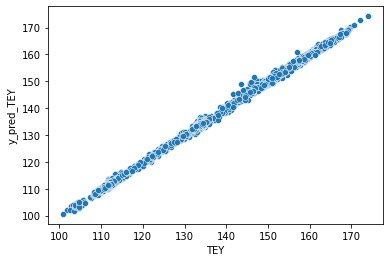

In [28]:
import seaborn as sns
sns.scatterplot(output.TEY,output.y_pred_TEY)
plt.show()

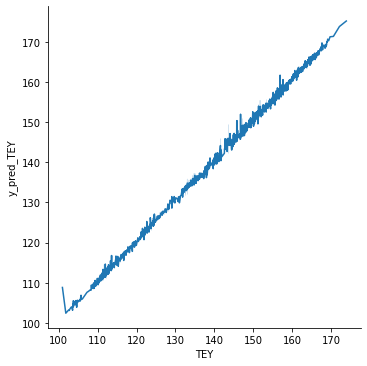

In [21]:
sns.relplot(x="TEY", y="y_pred_TEY", kind="line", data=output);